In [1]:
!pip install ultralytics
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 15.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [2]:
import ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import google.colab.drive as drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

dataset_path = '/content/drive/MyDrive/vehicle detection project'
os.listdir(dataset_path)

['labelled dataset']

In [5]:
# Inspect the top-level directory
top_level_path = '/content/drive/My Drive/vehicle detection project'
print("Top-level directory:", os.listdir(top_level_path))


Top-level directory: ['labelled dataset']


In [6]:
# Adjust the paths based on the verified directory structure
yaml_content = """
train: /content/drive/My Drive/vehicle detection project/labelled dataset/images/train
val: /content/drive/My Drive/vehicle detection project/labelled dataset/images/val

nc: 1
names: ['number plate']
"""

with open('/content/vehicle_detection_data.yaml', 'w') as f:
    f.write(yaml_content)

In [9]:
model = YOLO('yolov8s.pt')  # You can use other versions like yolov8s.pt, yolov8m.pt, etc.
model.train(data='/content/drive/MyDrive/vehicle detection project/labelled dataset/data.yaml', epochs=5 ,batch=16)


Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/vehicle detection project/labelled dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

train: Scanning /content/drive/MyDrive/vehicle detection project/labelled dataset/train/labels.cache... 2727 images, 45 backgrounds, 0 corrupt: 100%|██████████| 2727/2727 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/vehicle detection project/labelled dataset/valid/labels.cache... 260 images, 5 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.54G     0.7569      1.354     0.9733         11        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        260        258      0.852      0.826      0.888      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      4.58G      0.785       0.63     0.9914          9        640: 100%|██████████| 171/171 [01:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]

                   all        260        258      0.962      0.892      0.945      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      4.56G     0.7663     0.5904     0.9845          9        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]

                   all        260        258      0.984      0.935      0.953      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.56G     0.7013     0.5041      0.955          7        640: 100%|██████████| 171/171 [01:26<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        260        258      0.972      0.958      0.976      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.57G     0.6328     0.4411     0.9346          9        640: 100%|██████████| 171/171 [01:37<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        260        258      0.981      0.953       0.98       0.86



5 epochs completed in 0.138 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]


                   all        260        258      0.981      0.953       0.98      0.859
Speed: 0.2ms preprocess, 5.0ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x783be54ecc40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
metrics = model.val(data='/content/drive/MyDrive/vehicle detection project/labelled dataset/data.yaml')


Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/vehicle detection project/labelled dataset/valid/labels.cache... 260 images, 5 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.06it/s]


                   all        260        258      0.981      0.953       0.98       0.86
Speed: 0.4ms preprocess, 10.9ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train32


In [11]:
from ultralytics import YOLO

from IPython.display import display, Image

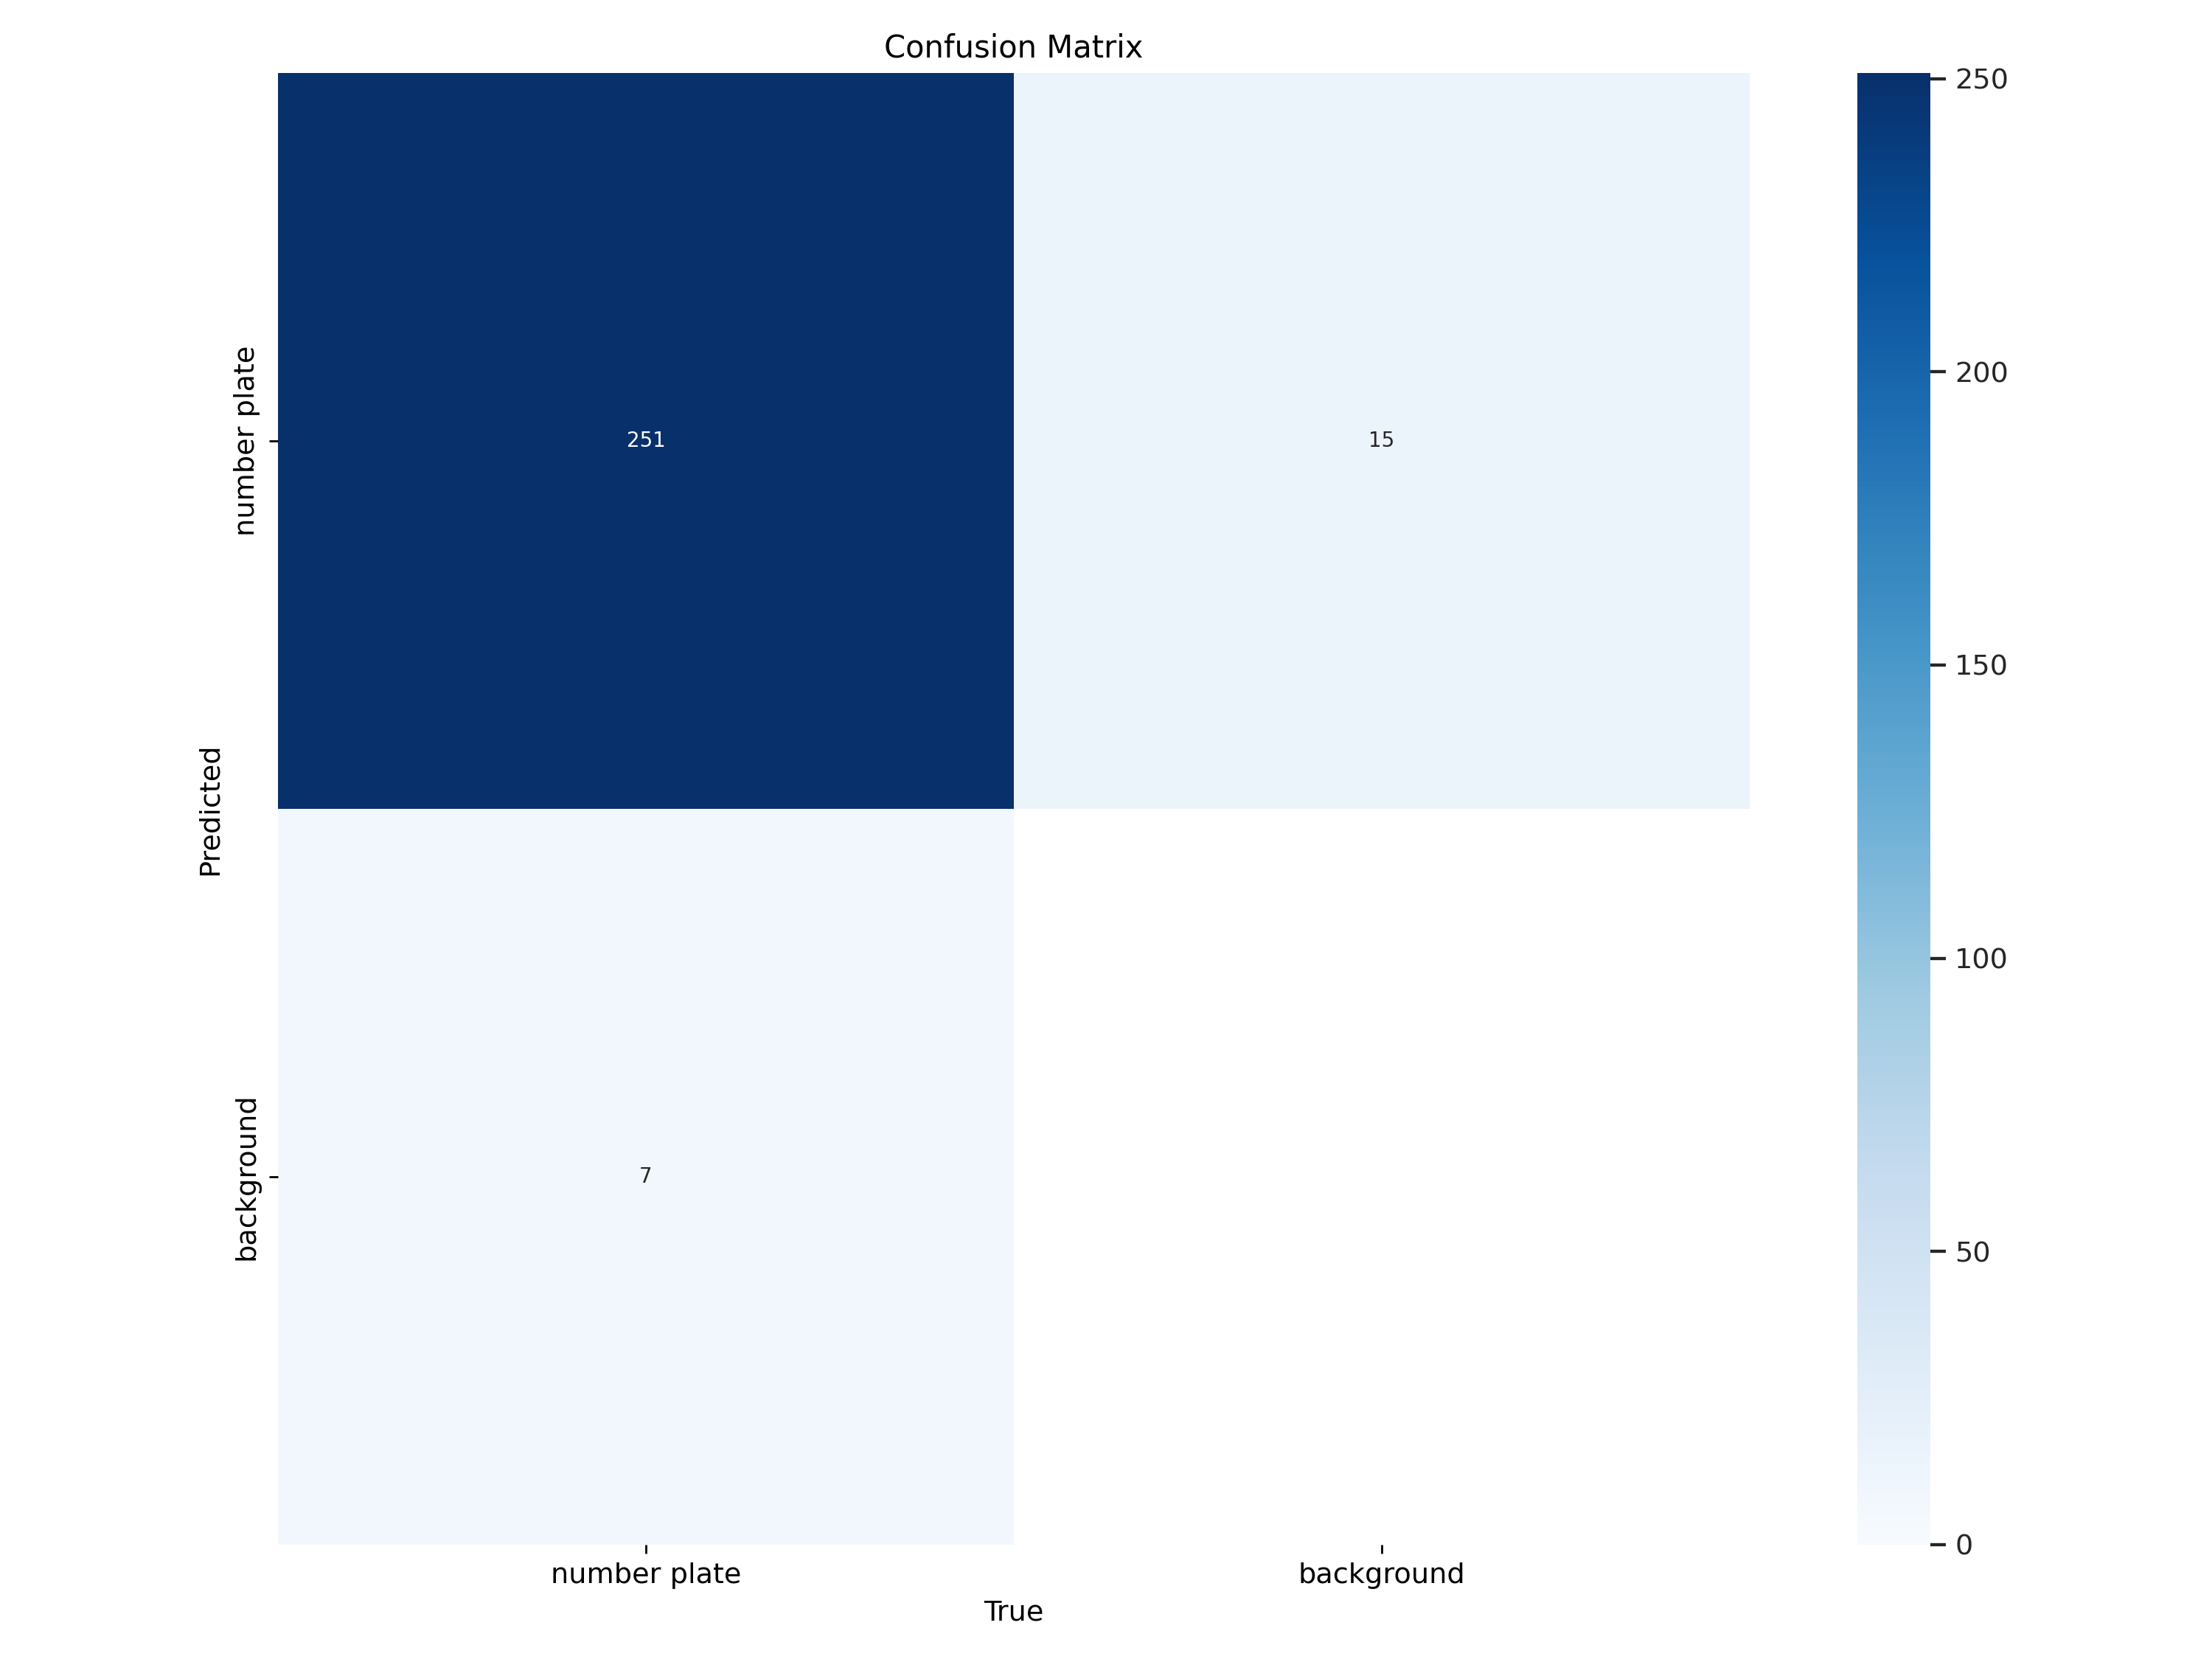

In [12]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

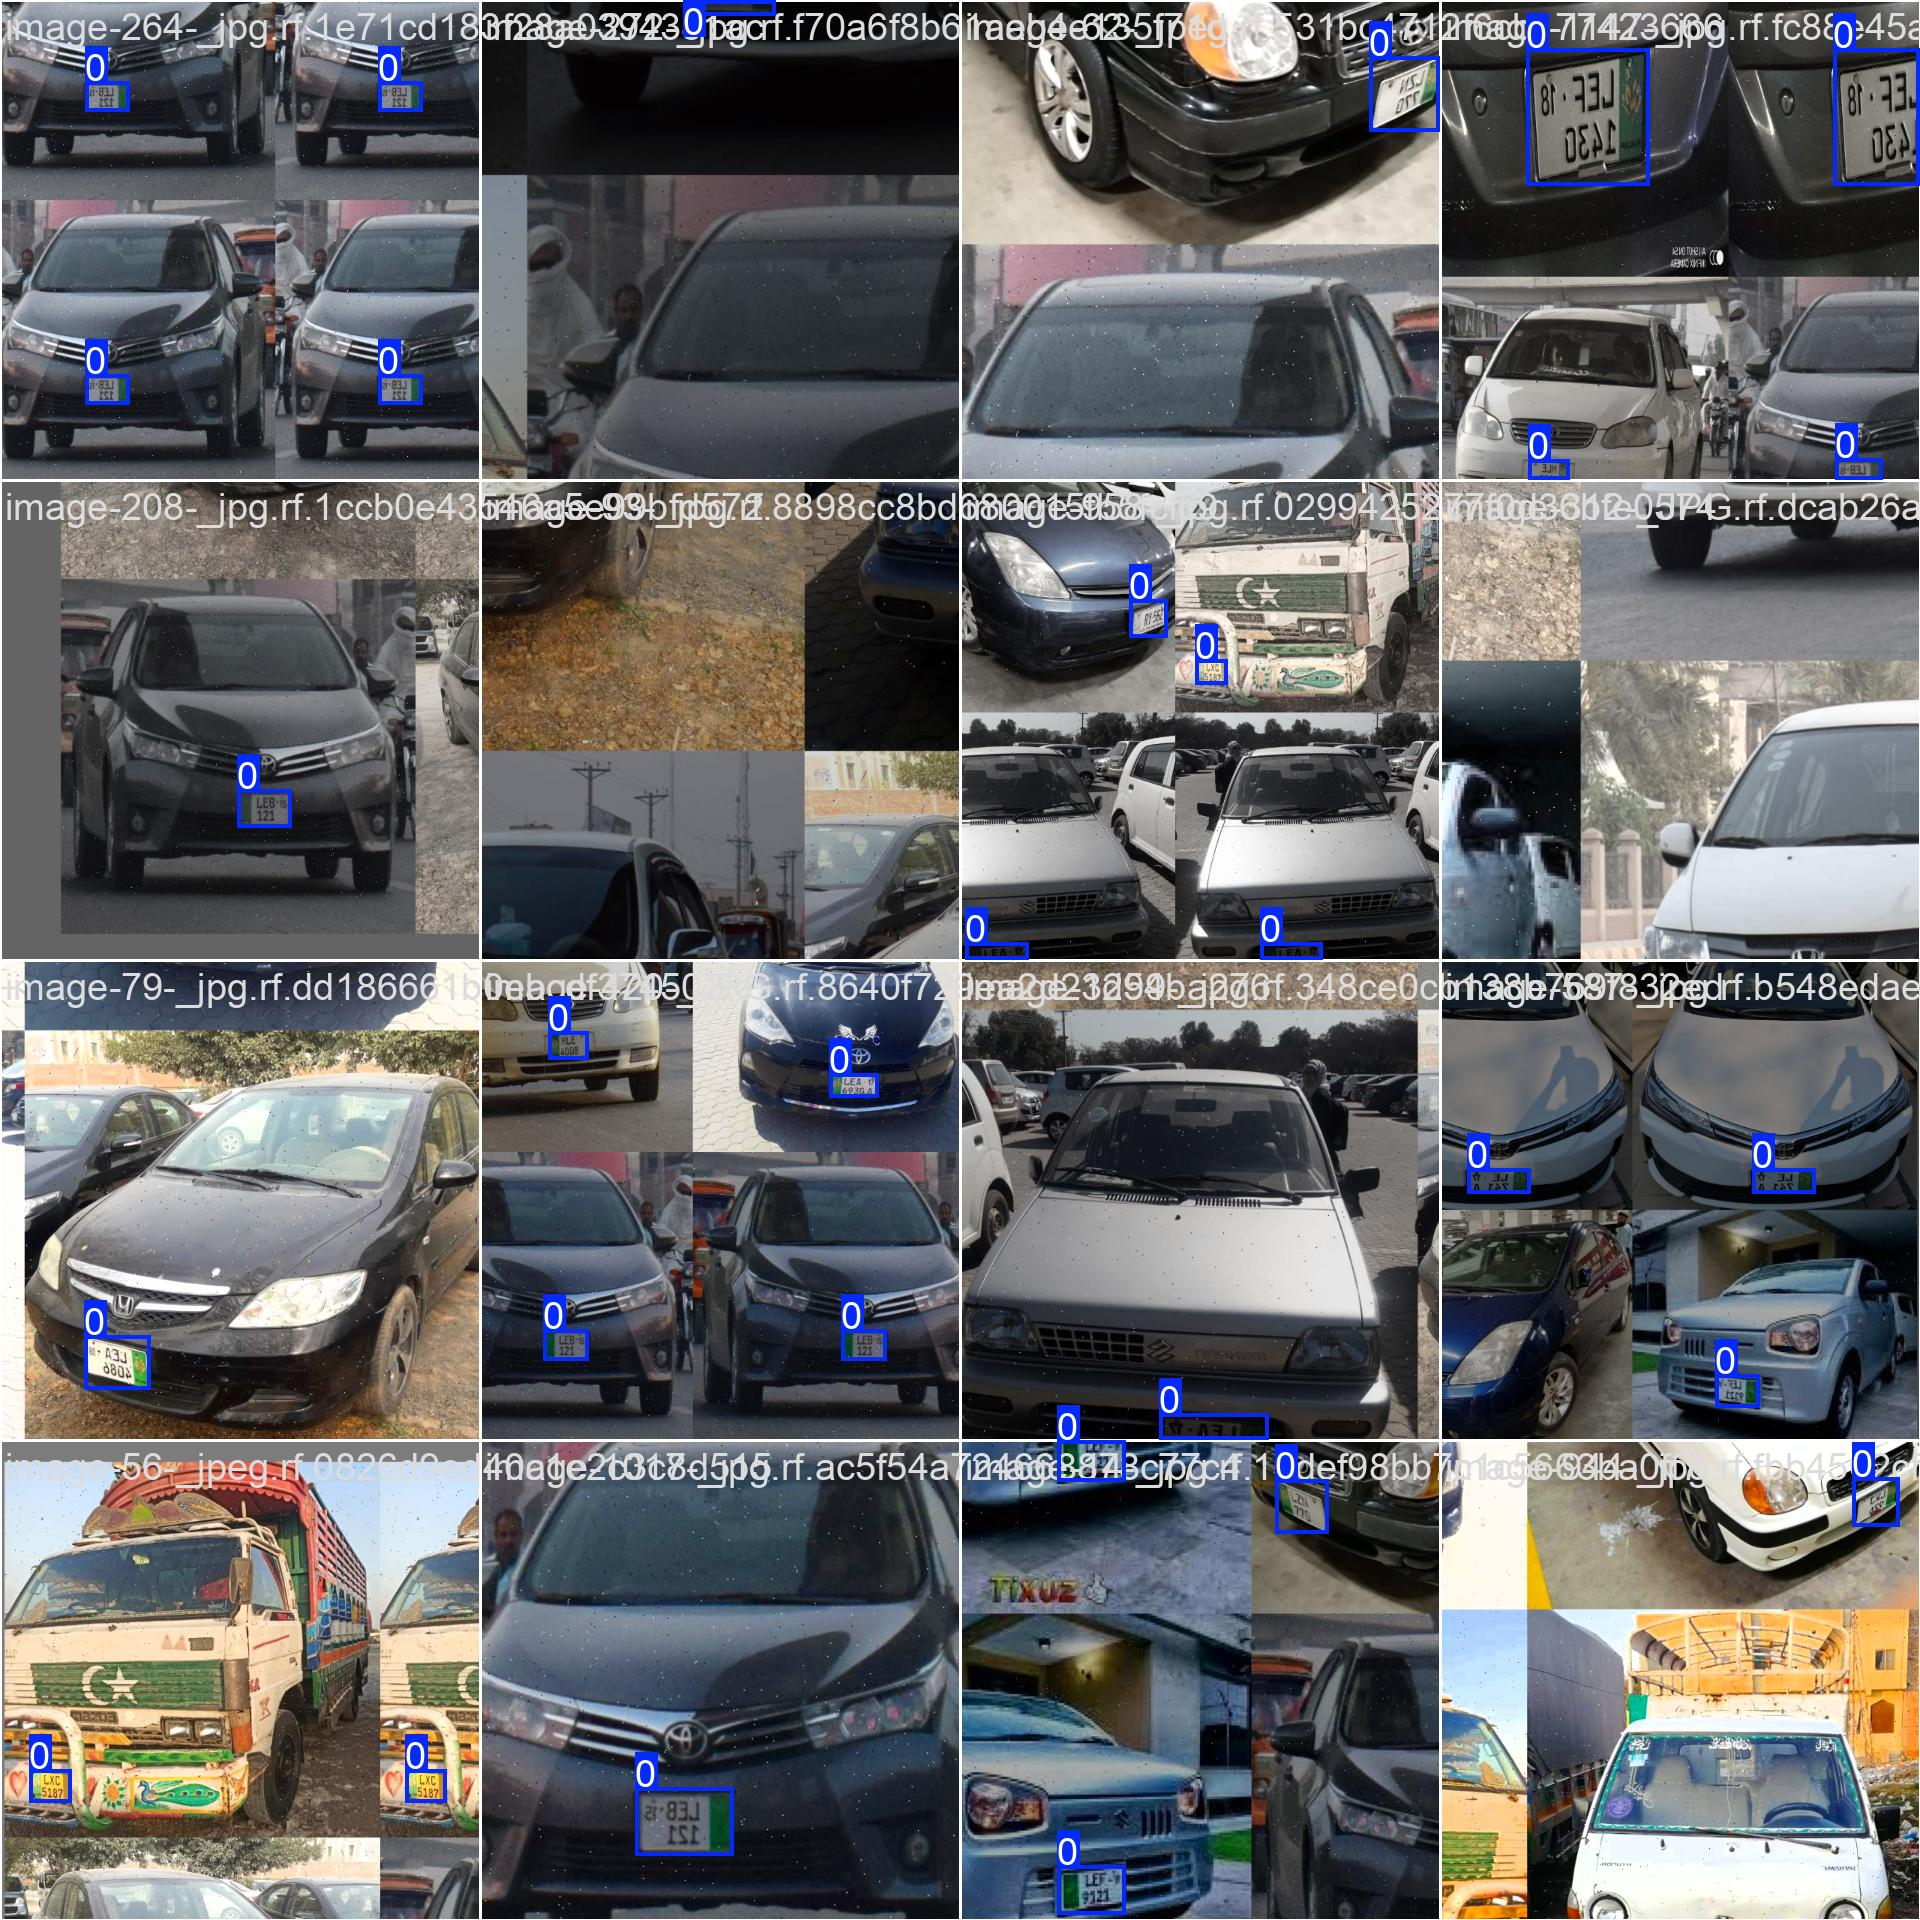

In [13]:
Image(filename='runs/detect/train3/train_batch0.jpg', width=600)

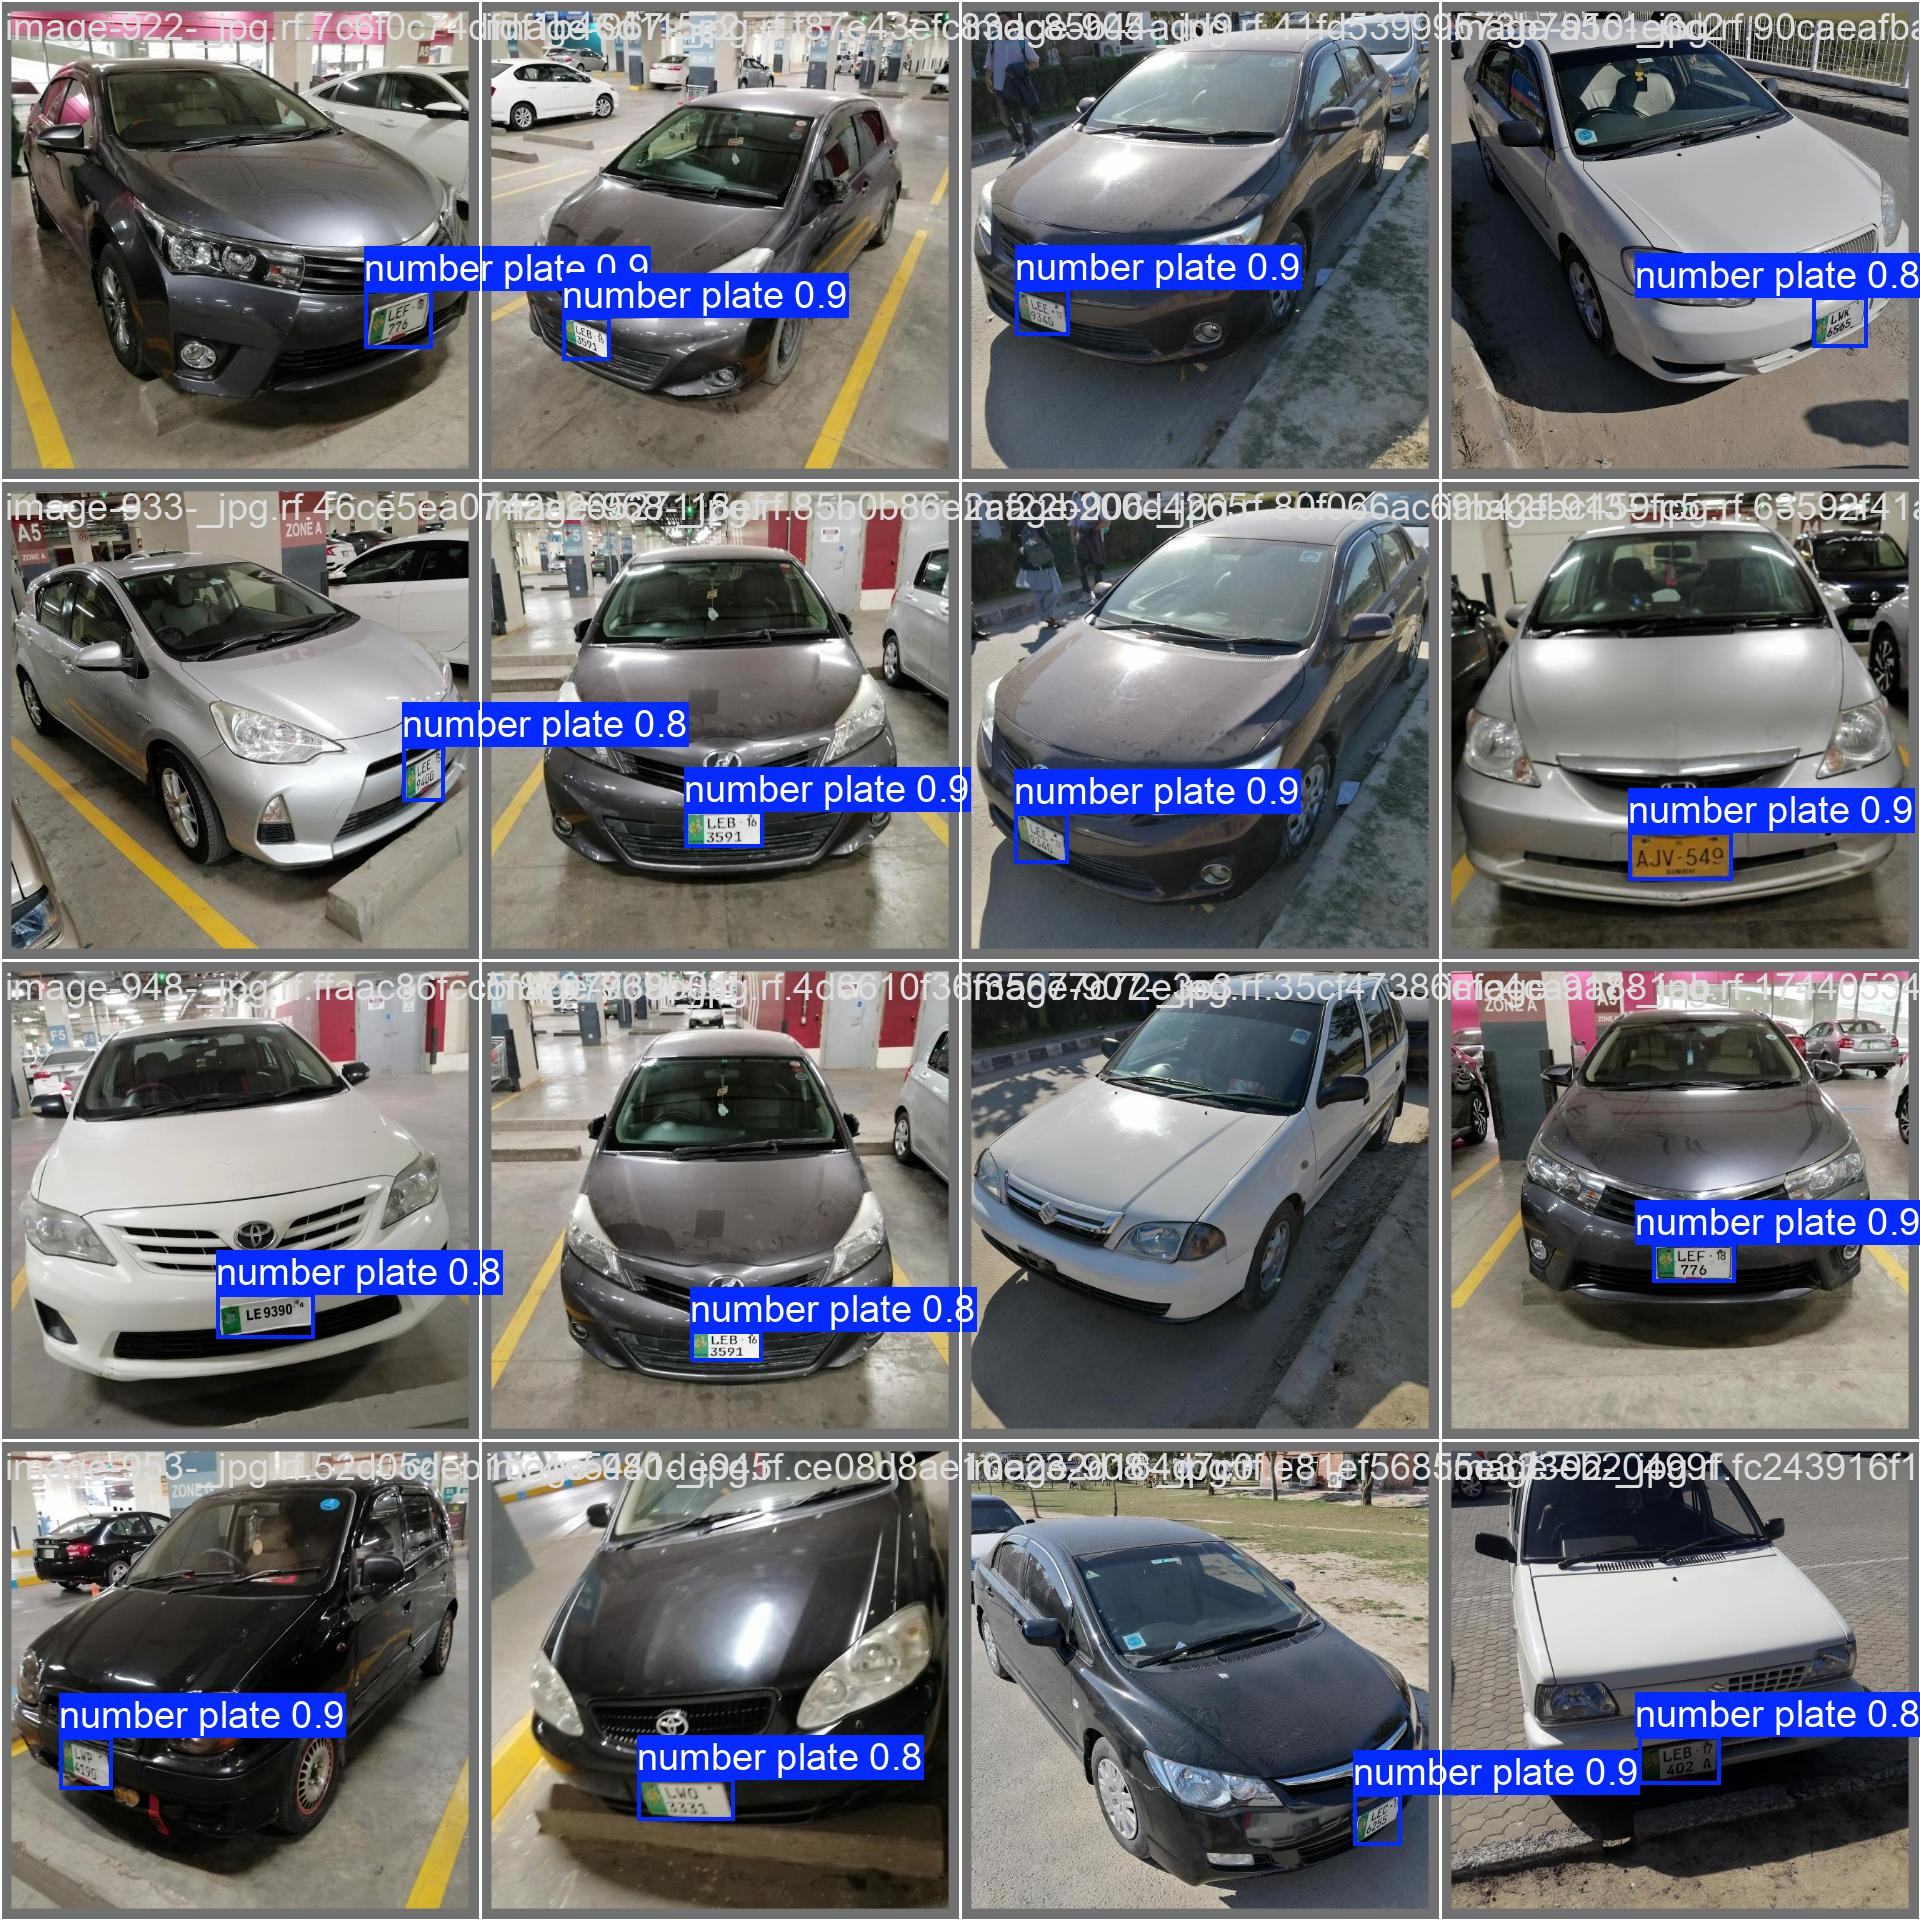

In [14]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

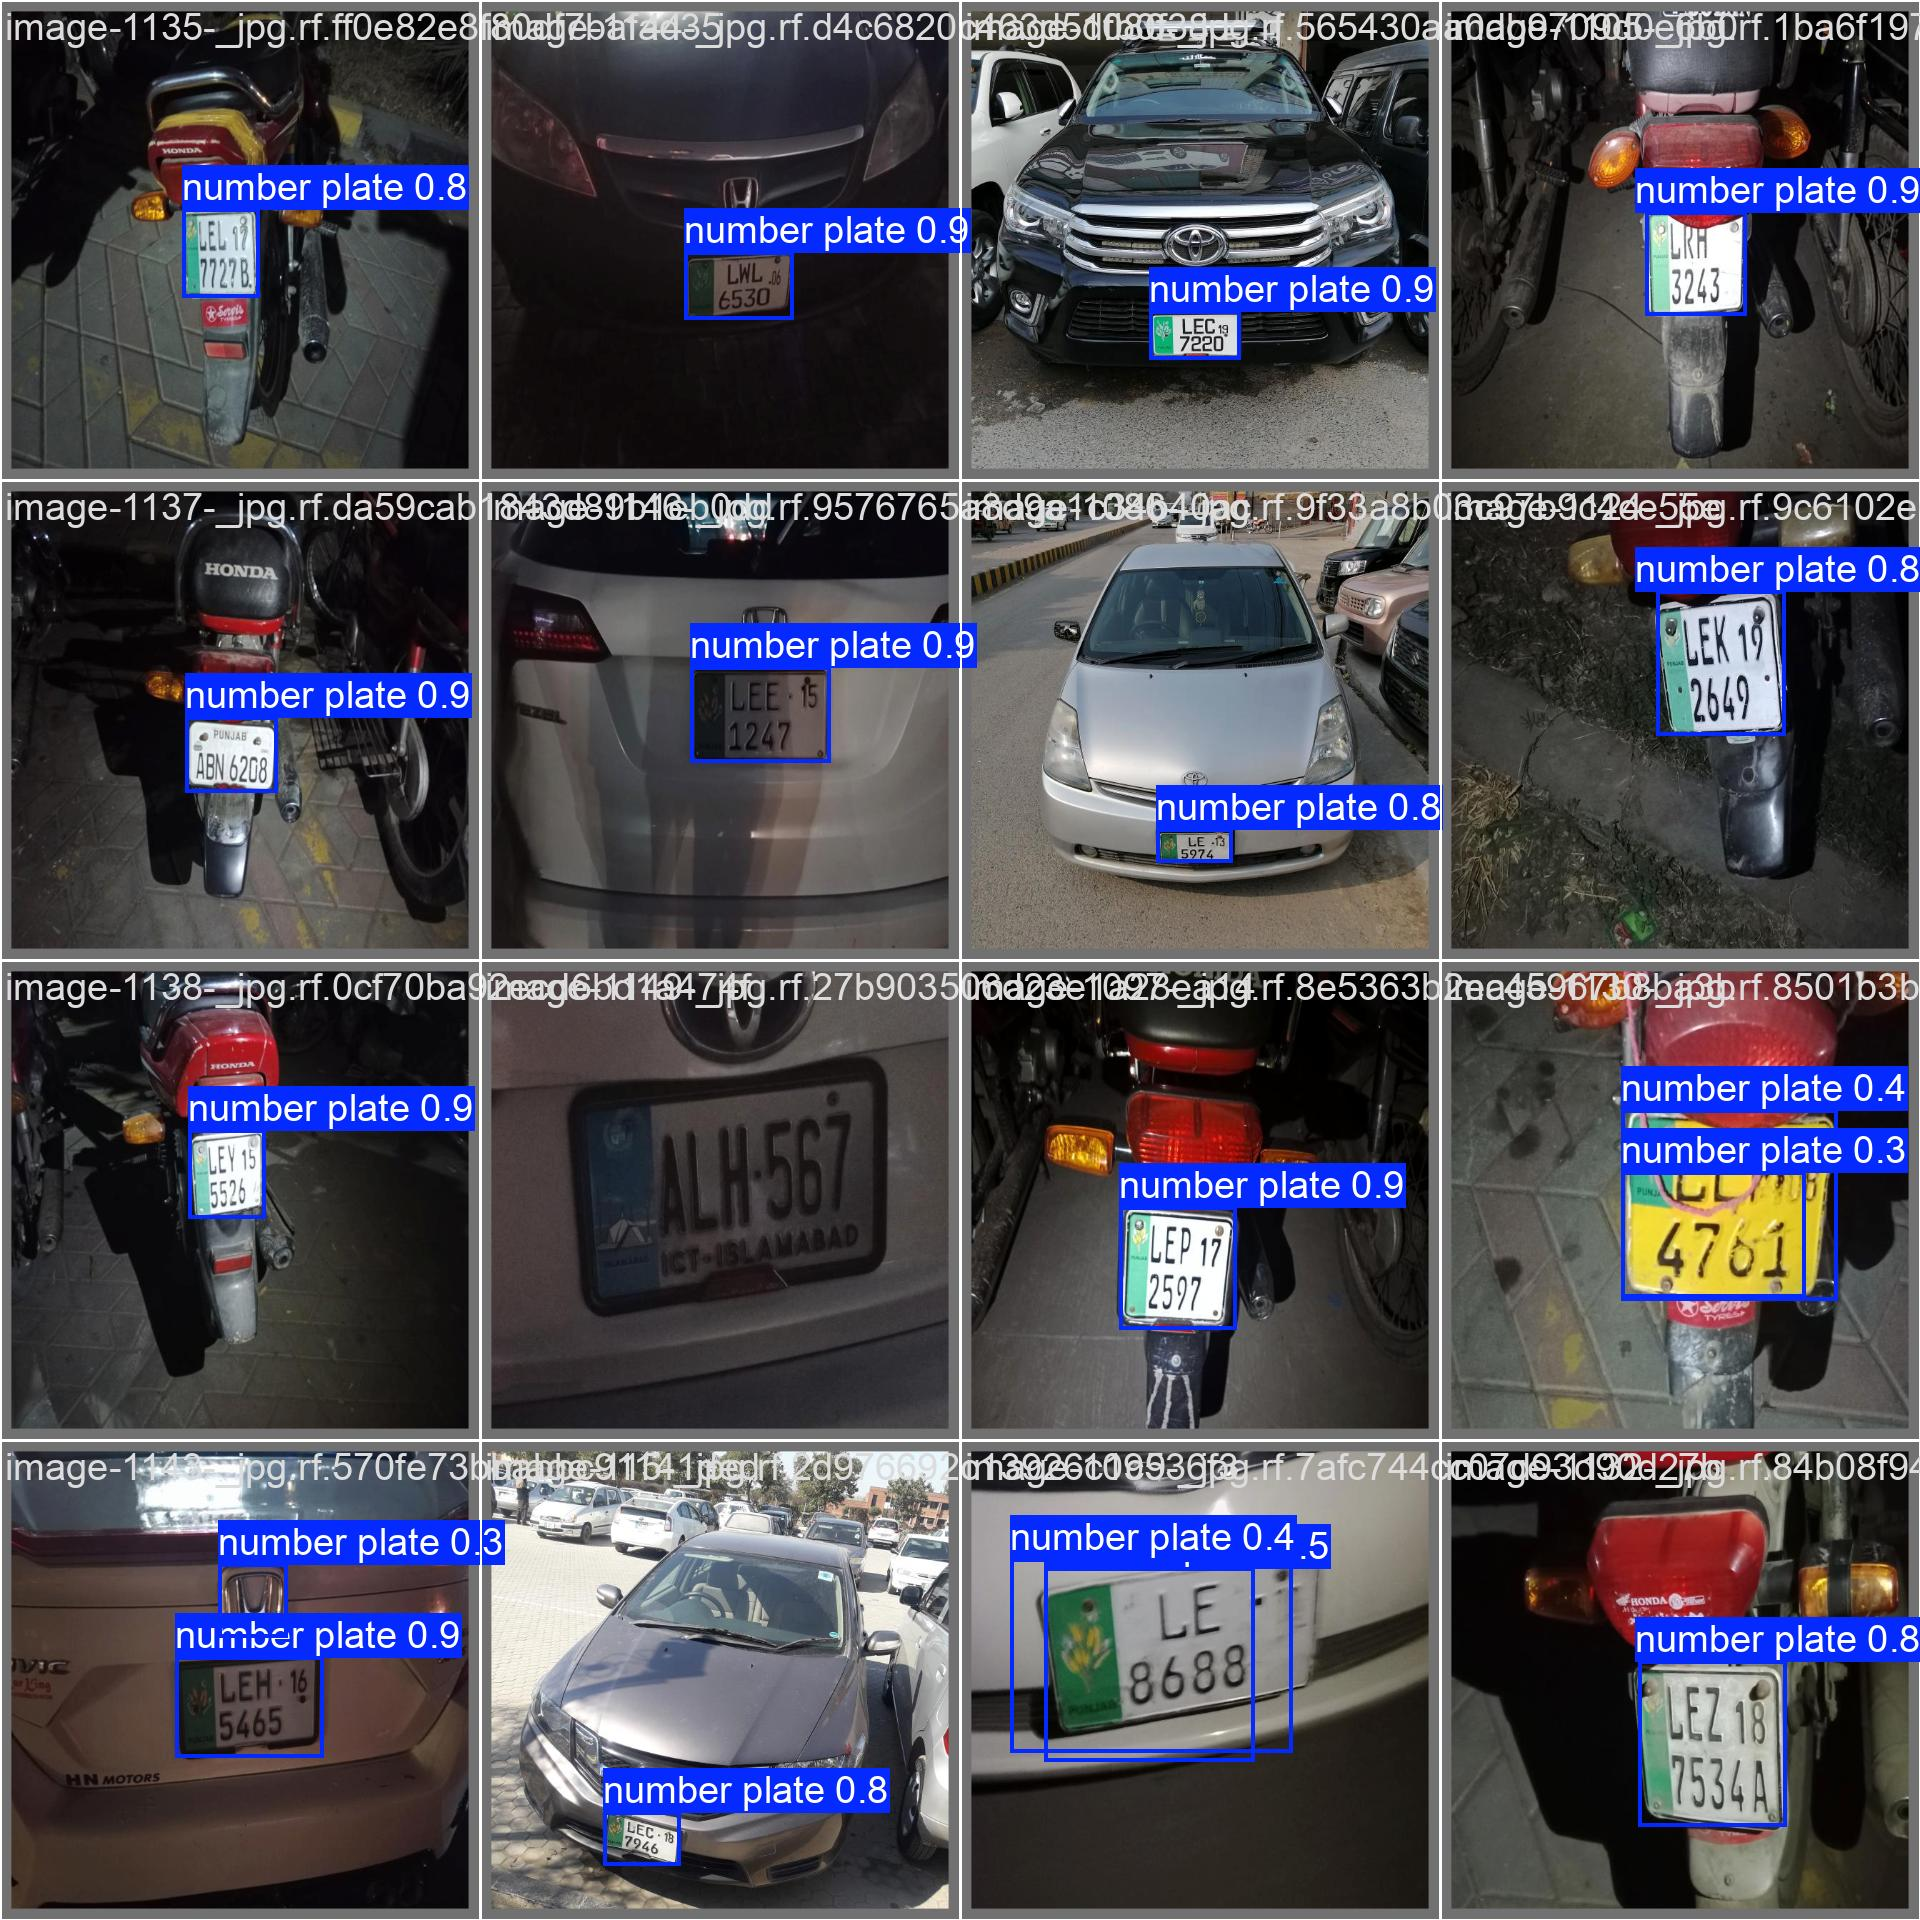

In [15]:
Image(filename='/content/runs/detect/train3/val_batch1_pred.jpg', width=600)

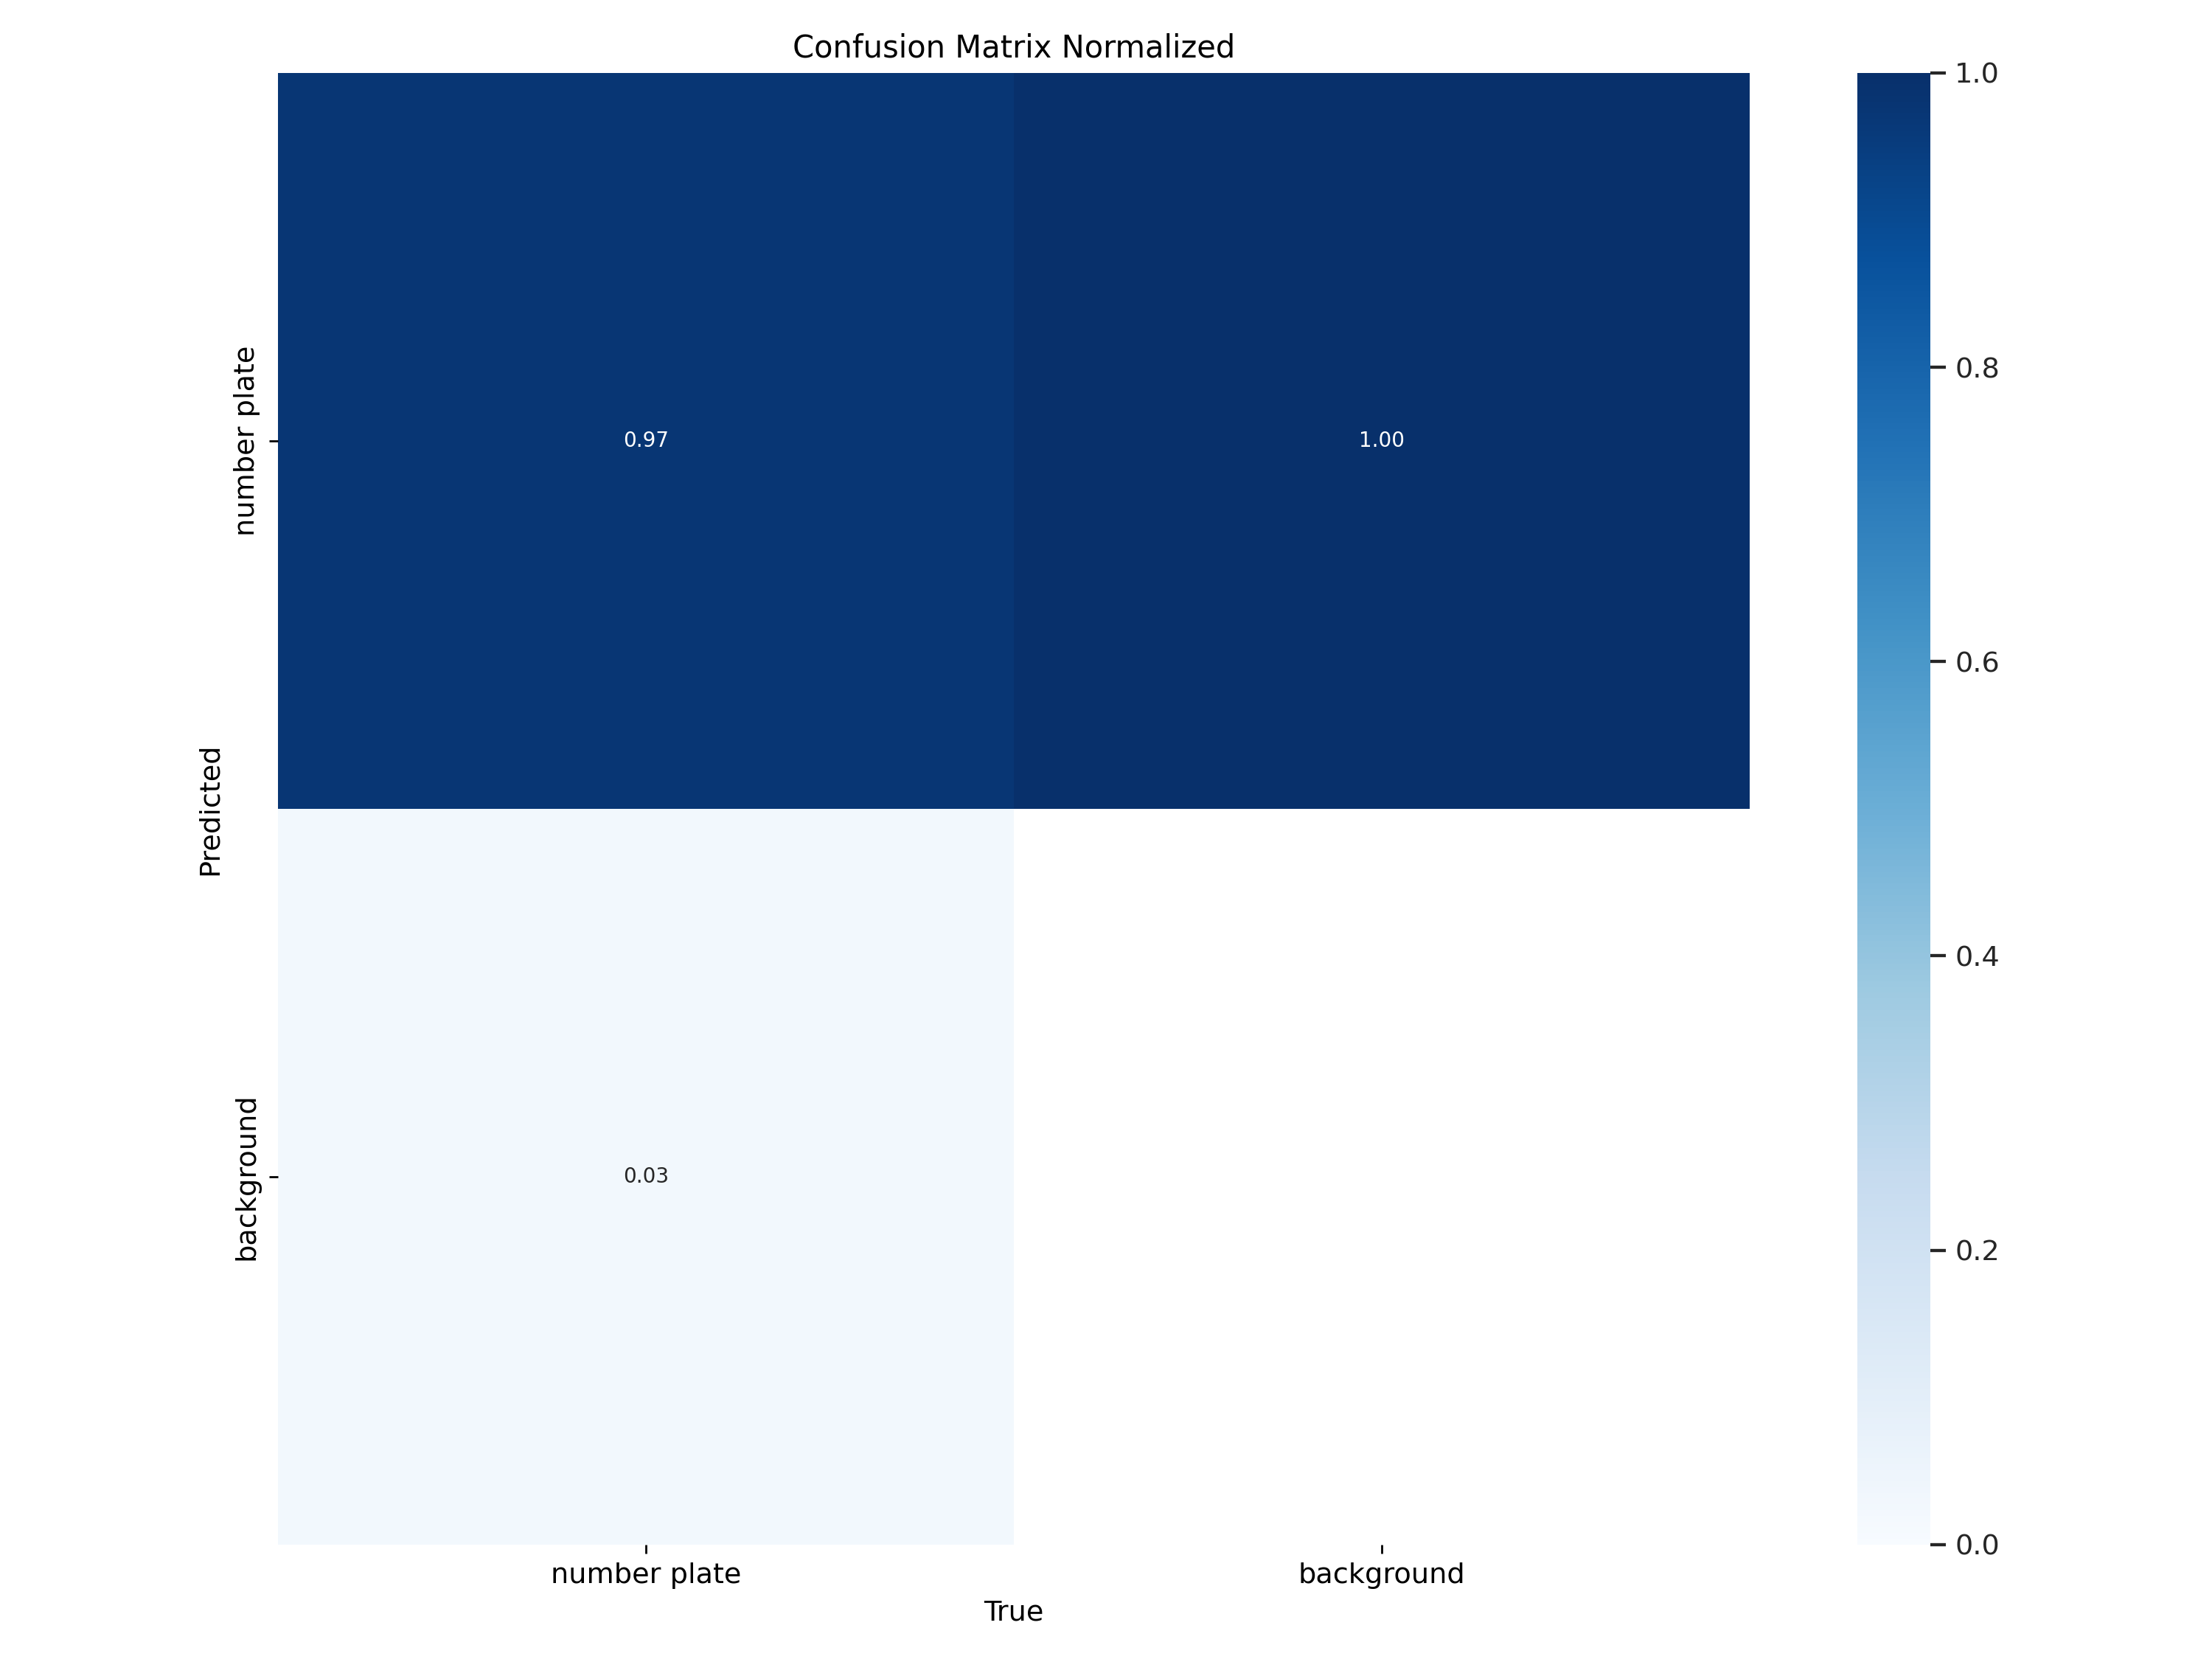

In [16]:
Image(filename='/content/runs/detect/train3/confusion_matrix_normalized.png', width=600)

In [17]:
model.save('/content/drive/MyDrive/vehicle detection project/labelled dataset/number_plate_detector.pt')


image 1/1 /content/drive/MyDrive/image (38).jpg: 640x640 1 number plate, 16.4ms
Speed: 5.5ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


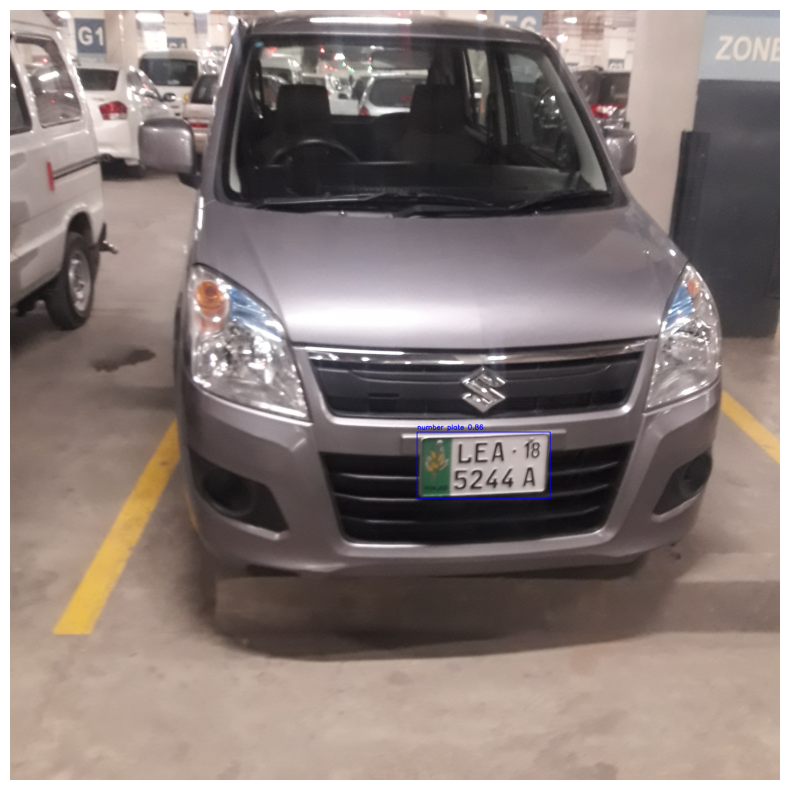


image 1/1 /content/drive/MyDrive/image (40).jpg: 640x640 1 number plate, 16.4ms
Speed: 3.9ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


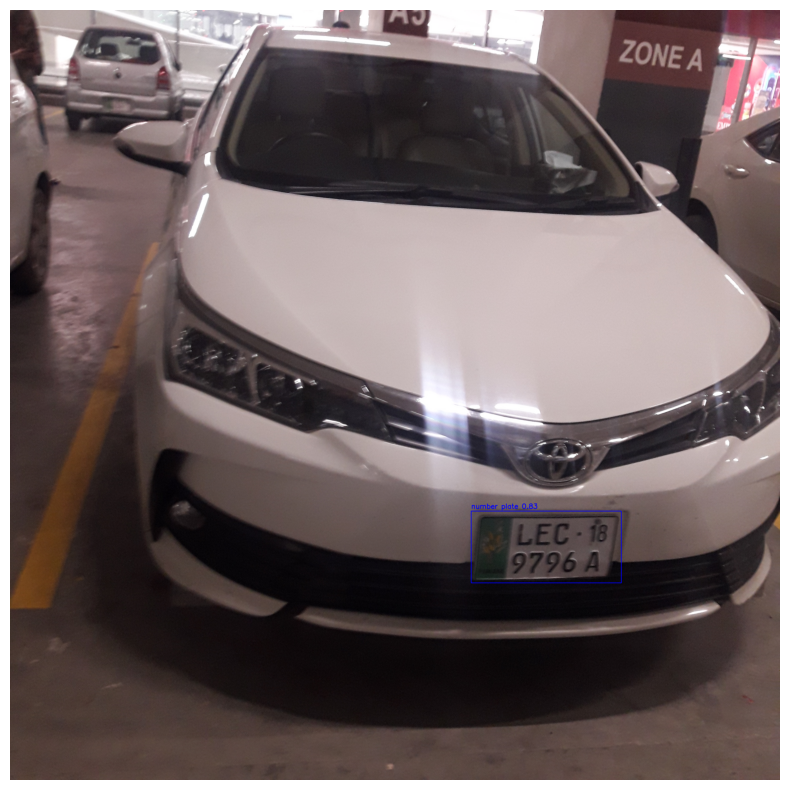


image 1/1 /content/drive/MyDrive/image (43).jpg: 640x640 1 number plate, 16.5ms
Speed: 5.1ms preprocess, 16.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


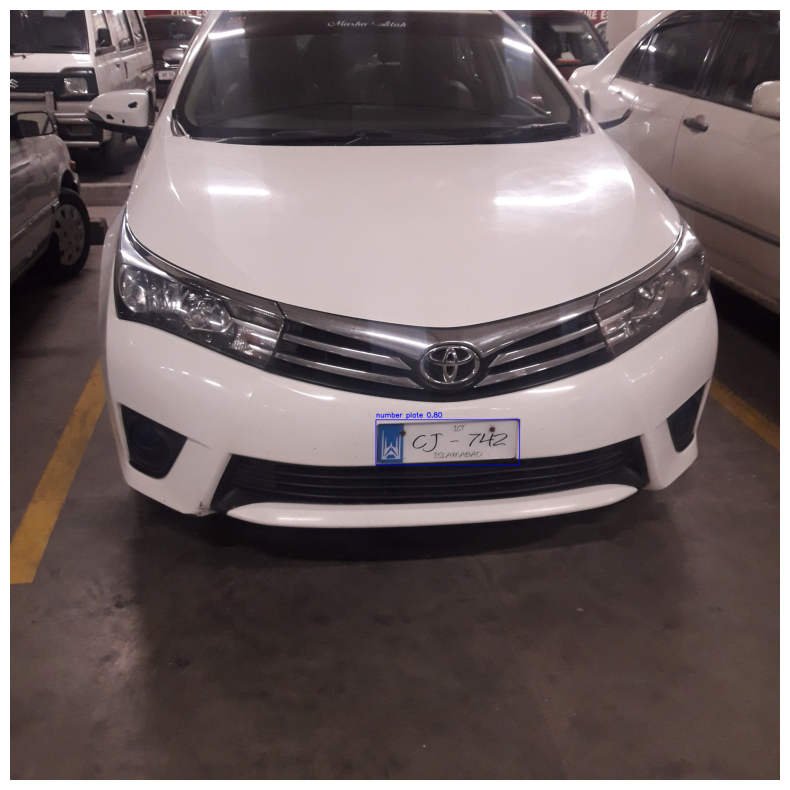


image 1/1 /content/drive/MyDrive/image (4).jpg: 640x640 1 number plate, 16.4ms
Speed: 2.4ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


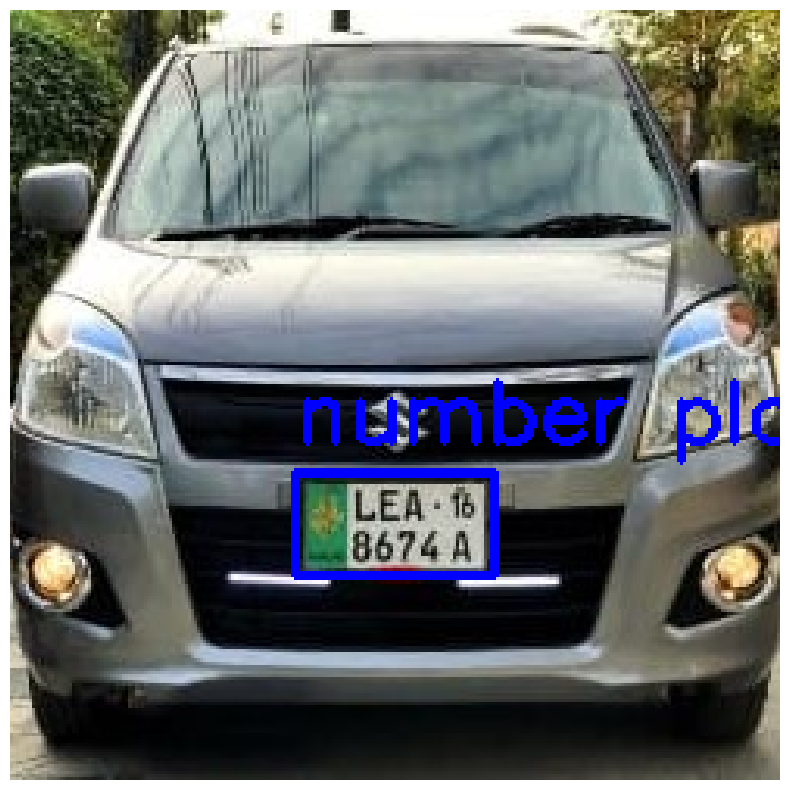


image 1/1 /content/drive/MyDrive/image (4).PNG: 640x640 1 number plate, 16.4ms
Speed: 3.1ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


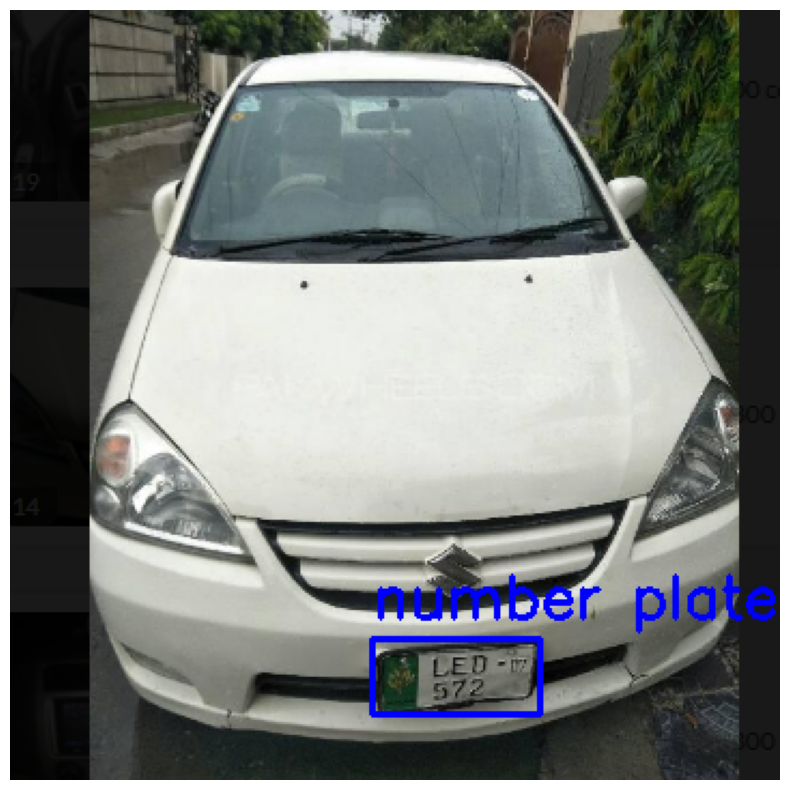


image 1/1 /content/drive/MyDrive/image (46).jpg: 640x640 1 number plate, 16.4ms
Speed: 3.9ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


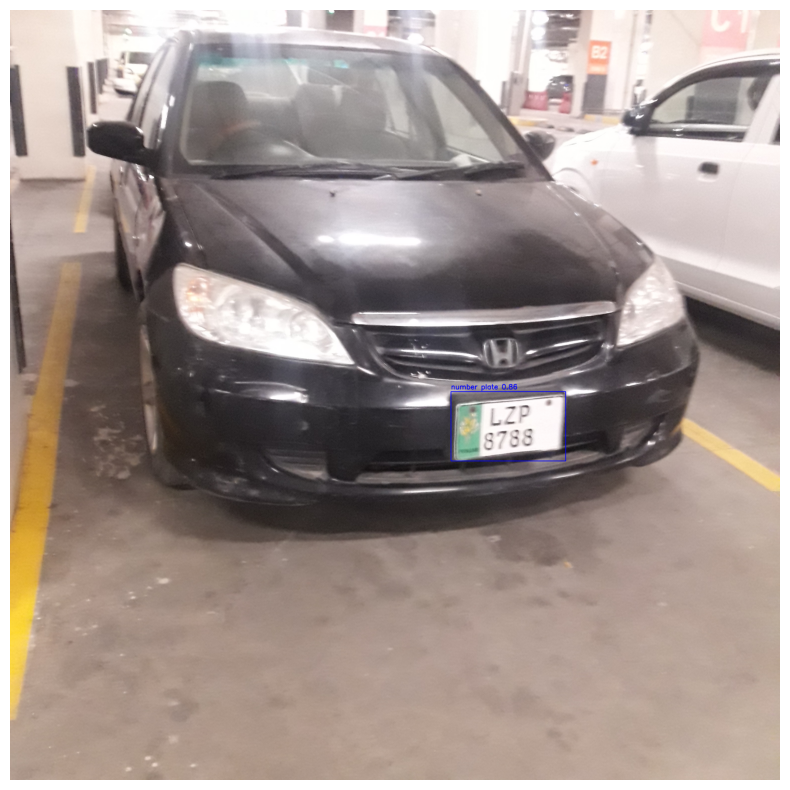


image 1/1 /content/drive/MyDrive/image (36).jpg: 640x640 1 number plate, 16.4ms
Speed: 2.9ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


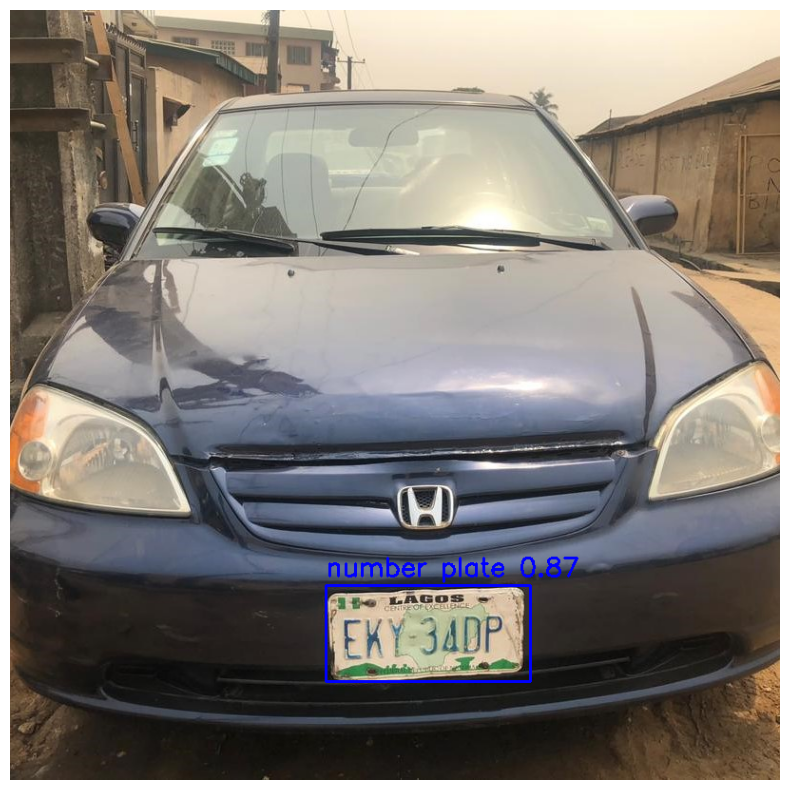

In [20]:
import matplotlib.pyplot as plt
import cv2

def visualize_predictions(model, img_paths):
    for img_path in img_paths:
        results = model(img_path)

        # Load the image
        img = cv2.imread(img_path)

        # Draw bounding boxes and labels
        for result in results:
            for box in result.boxes:
                # Convert tensor to list and then unpack
                x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
                confidence = box.conf.item()  # Extract scalar value from tensor
                label = model.names[box.cls.item()]  # Convert tensor to scalar

                # Draw bounding box
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

                # Draw label and confidence
                cv2.putText(img, f'{label} {confidence:.2f}', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Convert BGR image to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

# Paths to your test images
test_img_paths = [
    '/content/drive/MyDrive/image (38).jpg',
    '/content/drive/MyDrive/image (40).jpg',
    '/content/drive/MyDrive/image (43).jpg',
    '/content/drive/MyDrive/image (4).jpg',
    '/content/drive/MyDrive/image (4).PNG',
    '/content/drive/MyDrive/image (46).jpg',
    '/content/drive/MyDrive/image (36).jpg'
]

# Perform inference and visualize results
visualize_predictions(model, test_img_paths)
